# Create Expected Goals Table

In [87]:
from fotmob_api import FotmobAPI
import pandas as pd
from plottable.cmap import normed_cmap
from plottable import Table, ColumnDefinition
import matplotlib
import matplotlib.pyplot as plt

# Initialize client
client = FotmobAPI()

# Get all leagues
all_leagues = client.get_league_all()

# Create dataframe for country leagues
df_country_leagues = pd.json_normalize(all_leagues["countries"], record_path=["leagues"], meta=["ccode", "name", "localizedName"], record_prefix="league")
df_country_leagues.head()

,leagueid,leaguename,leaguelocalizedName,leaguepageUrl,ccode,name,localizedName
0,10175,Super Cup,Super Cup,/leagues/10175/overview/super-cup,ALB,Albania,Albania
1,260,Superiore,Superiore,/leagues/260/overview/superiore,ALB,Albania,Albania
2,9173,Superiore Qualification,Superiore Qualification,/leagues/9173/overview/superiore-qualification,ALB,Albania,Albania
3,516,Ligue 1,Ligue 1,/leagues/516/overview/ligue-1,ALG,Algeria,Algeria
4,112,Liga Profesional,Liga Profesional,/leagues/112/overview/liga-profesional,ARG,Argentina,Argentina


In [88]:
# Get Premier League league id
league_id = df_country_leagues[(df_country_leagues["leaguename"]=="Premier League") & (df_country_leagues["name"]=="England")]["leagueid"].item()

# Get table from Premier League
league_table = client.get_league_table(league_id=league_id)

table = league_table[0]["data"]["table"]
df_table_xg = pd.DataFrame(table["xg"])
df_table_xg.head()

,name,shortName,id,pageUrl,ongoing,played,wins,draws,losses,scoresStr,...,xgConceded,xPoints,position,xgDiff,xgConcededDiff,xPointsDiff,xPosition,idx,xPositionDiff,qualColor
0,Arsenal,Arsenal,9825,/teams/9825/overview/arsenal,None,23,15,4,4,47-22,...,17.8359,48.220737,1,-1.9383,-4.1641,-0.779263,1,1,2,#2AD572
1,Manchester City,Man City,8456,/teams/8456/overview/manchester-city,None,22,15,4,3,54-25,...,21.8244,44.761720,2,-9.7218,-3.1756,-4.238280,2,2,0,#2AD572
2,Liverpool,Liverpool,8650,/teams/8650/overview/liverpool,None,23,15,6,2,52-22,...,28.3016,43.360581,3,-2.2454,6.3016,-7.639419,3,3,-2,#2AD572
3,Aston Villa,Aston Villa,10252,/teams/10252/overview/aston-villa,None,23,14,4,5,49-30,...,31.1927,38.615059,4,-7.3996,1.1927,-7.384941,4,4,0,#2AD572
4,Chelsea,Chelsea,8455,/teams/8455/overview/chelsea,None,23,9,4,10,38-39,...,35.0561,38.520720,5,6.3902,-3.9439,7.520720,5,5,6,#0046A7


Text(0.5, 1.0, 'Expected Goals Table - 2023/2024')

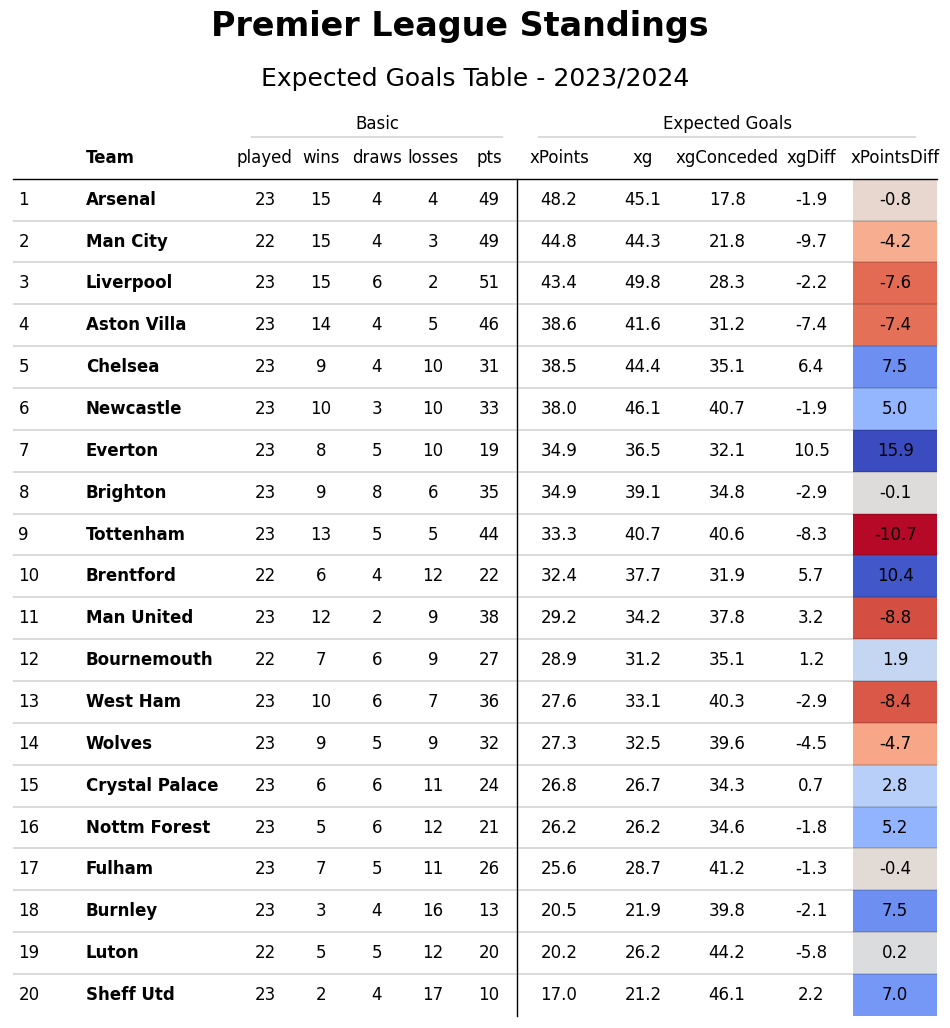

In [96]:
# Subset columns for table plot
columns = ["shortName", "played", "wins", "draws", "losses", "pts","xPoints",
           "xg","xgConceded", "xgDiff", "xPointsDiff", "idx"]
column_names = []
df_table_xg_plot = df_table_xg[columns].set_index("idx").round(1)

col_def = (
    [
        ColumnDefinition(
            name="idx",
            title="",
            textprops={"ha": "left"},
            width=0.5,
        ),
        ColumnDefinition(
            name="shortName",
            title="Team",
            textprops={"ha": "left", "weight": "bold"},
            width=1.5,
        ),
        ColumnDefinition(
            name="played",
            textprops={"ha": "center"},
            width=0.5,
            group="Basic"
        ),
        ColumnDefinition(
            name="wins",
            textprops={"ha": "center"},
            width=0.5,
            group="Basic"
        ),
        ColumnDefinition(
            name="draws",
            textprops={"ha": "center"},
            width=0.5,
            group="Basic"
        ),
        ColumnDefinition(
            name="losses",
            textprops={"ha": "center"},
            width=0.5,
            group="Basic"
        ),
        ColumnDefinition(
            name="pts",
            textprops={"ha": "center"},
            width=0.5,
            group="Basic",
            border="right"
        ),
        ColumnDefinition(
            name="xPoints",
            textprops={"ha": "center"},
            width=0.75,
            group="Expected Goals"
        ),
        ColumnDefinition(
            name="xg",
            textprops={"ha": "center"},
            width=0.75,
            group="Expected Goals"
        ),
        ColumnDefinition(
            name="xgConceded",
            textprops={"ha": "center"},
            width=0.75,
            group="Expected Goals"
        ),
        ColumnDefinition(
            name="xgDiff",
            textprops={"ha": "center"},
            width=0.75,
            group="Expected Goals"
        ),
        ColumnDefinition(
            name="xPointsDiff",
            textprops={"ha": "center"},
            width=0.75,
            group="Expected Goals",
            cmap=normed_cmap(df_table_xg_plot["xPointsDiff"], cmap=matplotlib.cm.coolwarm_r, num_stds=1.5)
        )
        ])

# Plot table
fig, ax = plt.subplots(figsize=(12, 12))
table_plot = Table(df=df_table_xg_plot, column_definitions=col_def, ax=ax, textprops={"fontsize": 12})

fig.suptitle("Premier League Standings", y=0.95, fontweight="bold", fontsize=24)
ax.set_title("Expected Goals Table - 2023/2024", fontweight="regular", fontsize=18)